# Markowitz Portfolio Optimierung
## Ziel
Das Ziel dieses Projektes ist es eine interakti
ve Form des optimalen Portfolios nach Markowitz zu erstellen. Dabei soll sowohl der Risikofaktor, als auch das Portfolio(bestehend aus DAX30 Aktien) anpassbar sein. 

In [4]:
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [8]:
df = yf.download('DTE.DE FME.DE AAPL WDP.DE HFG.DE', period="10y")

[*********************100%***********************]  5 of 5 completed


In [3]:
df.head

<bound method NDFrame.head of              Adj Close                                               \
                  AAPL     DTE.DE     FME.DE     HFG.DE      WDP.DE   
Date                                                                  
2010-07-26   32.065430   5.377336  35.412117        NaN   22.498596   
2010-07-27   32.659046   5.414041  37.133247        NaN   22.308357   
2010-07-28   32.273190   5.374714  37.111729        NaN   22.219582   
2010-07-29   31.920740   5.421906  36.315712        NaN   21.999754   
2010-07-30   31.814383   5.406175  36.233952        NaN   21.847567   
...                ...        ...        ...        ...         ...   
2020-07-20  393.429993        NaN        NaN        NaN         NaN   
2020-07-21  388.000000  15.420000  78.139999  42.200001  104.239998   
2020-07-22  389.089996  15.275000  78.540001  43.639999  102.160004   
2020-07-23  371.380005  15.230000  79.000000  45.560001  102.099998   
2020-07-24  370.459991  14.880000  76.419998  4

In [9]:
data =df['Adj Close']
data.describe()

,AAPL,DTE.DE,FME.DE,HFG.DE,WDP.DE
count,2518.000000,2535.000000,2535.000000,685.000000,2326.000000
mean,119.365661,9.496943,59.701139,15.552407,70.659180
std,72.383200,3.267124,14.328208,9.696248,33.406018
min,29.672398,4.441216,35.373398,5.970000,20.351044
25%,66.093098,5.769567,45.838781,9.180000,27.305870
50%,101.109985,10.783264,60.968163,12.100000,81.894855
75%,162.759773,12.226096,72.031715,17.459999,95.330494
max,393.429993,15.420000,87.423950,52.000000,137.682953


In [10]:
corr =data.corr()
corr.style.background_gradient(cmap='coolwarm')

,AAPL,DTE.DE,FME.DE,HFG.DE,WDP.DE
AAPL,1.000000,0.818556,0.668304,0.877462,0.791691
DTE.DE,0.818556,1.000000,0.862030,0.293997,0.954935
FME.DE,0.668304,0.862030,1.000000,0.070060,0.792953
HFG.DE,0.877462,0.293997,0.070060,1.000000,0.082603
WDP.DE,0.791691,0.954935,0.792953,0.082603,1.000000


Text(0, 0.5, 'Returns')

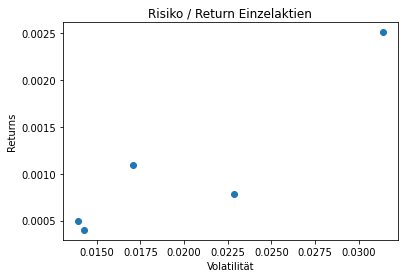

In [11]:
returns = data.pct_change()
cov_returns = returns.cov()
mean_returns = returns.mean()
std_returns = returns.std()

#plotten der Einzelaktien
plt.scatter(std_returns, mean_returns)
plt.title('Risiko / Return Einzelaktien')
plt.xlabel('Volatilität')
plt.ylabel('Returns')

# Generieren zufälliger Portfolios

Wir haben 5 Aktien und müssen entscheiden wie wir Anlegen, dazu ist unser Budget 1. 

In [12]:
from numpy import random
num_portfolios = 2000

def portfolio_performance(weights, mean_returns, cov_returns):
    pf_return = np.dot(weights, mean_returns) * 252
    pf_std = np.sqrt(np.dot( weights, np.dot(cov_returns, np.transpose(weights)))) *np.sqrt(252)
    pf_sharpe = pf_return[0] / pf_std[0][0]
    return weights[0][0], weights[0][1], weights[0][2], weights[0][3], weights[0][4], pf_return[0], pf_std[0][0], pf_sharpe

In [13]:
df_portfolios= pd.DataFrame(columns = ['% DTE.DE', '% FME.DE', '% AAPL', '% WDP.DE', '% HFG.DE', 'returns', 'volatility'])
for i in range(num_portfolios):
    weights = np.random.dirichlet(np.ones(5), size=1)
    stk1, stk2, stk3, stk4, stk5, ret, vol, sharpe = portfolio_performance(weights, mean_returns, cov_returns)
    df_portfolios = df_portfolios.append({ '% DTE.DE': stk1,
                                            '% FME.DE': stk2,
                                            '% AAPL': stk3,
                                            '% WDP.DE': stk4,
                                            '% HFG.DE': stk5,
                                            'returns': ret,
                                            'volatility': vol,
                                            'sharpe ratio': sharpe}
                         ,ignore_index = True
                        )
df_portfolios.head()

,% DTE.DE,% FME.DE,% AAPL,% WDP.DE,% HFG.DE,returns,volatility,sharpe ratio
0,0.131690,0.031764,0.044137,0.046268,0.746141,0.221717,0.283749,0.781387
1,0.183347,0.123565,0.192604,0.425164,0.075321,0.368892,0.251299,1.467942
2,0.099572,0.266392,0.509004,0.092950,0.032081,0.176882,0.175810,1.006095
3,0.052838,0.055938,0.372540,0.102649,0.416036,0.206353,0.206013,1.001647
4,0.200355,0.362732,0.021804,0.412655,0.002454,0.363623,0.249807,1.455616


In [46]:
# Berechnen max sharpe

max_sharpe = df_portfolios['sharpe ratio'].max()
ind_max_sharpe = df_portfolios[df_portfolios['sharpe ratio'] == max_sharpe]
ind_max_sharpe

,% DTE.DE,% FME.DE,% AAPL,% WDP.DE,% HFG.DE,returns,volatility,sharpe ratio
1628,0.419664,0.046513,0.02589,0.342239,0.165693,0.373172,0.239552,1.557794


Text(0, 0.5, 'Returns')

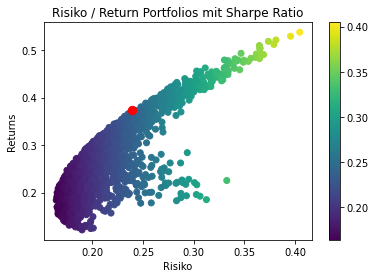

In [45]:
plt.scatter(df_portfolios['volatility'], df_portfolios['returns'], c=df_portfolios['volatility'])
plt.colorbar()
plt.scatter(ind_max_sharpe['volatility'], ind_max_sharpe['returns'], c='red', s=70)

plt.title('Risiko / Return Portfolios mit Sharpe Ratio')
plt.xlabel('Risiko')
plt.ylabel('Returns')

In [ ]:
#finden der dominierenden Portfolios
# Portfolio dominiert, wenn es einen höheren Return für gleiches oder geringeres Risiko hat

                   